
<center> <h1> Titanic - Machine Learning from Disaster</h1></center>

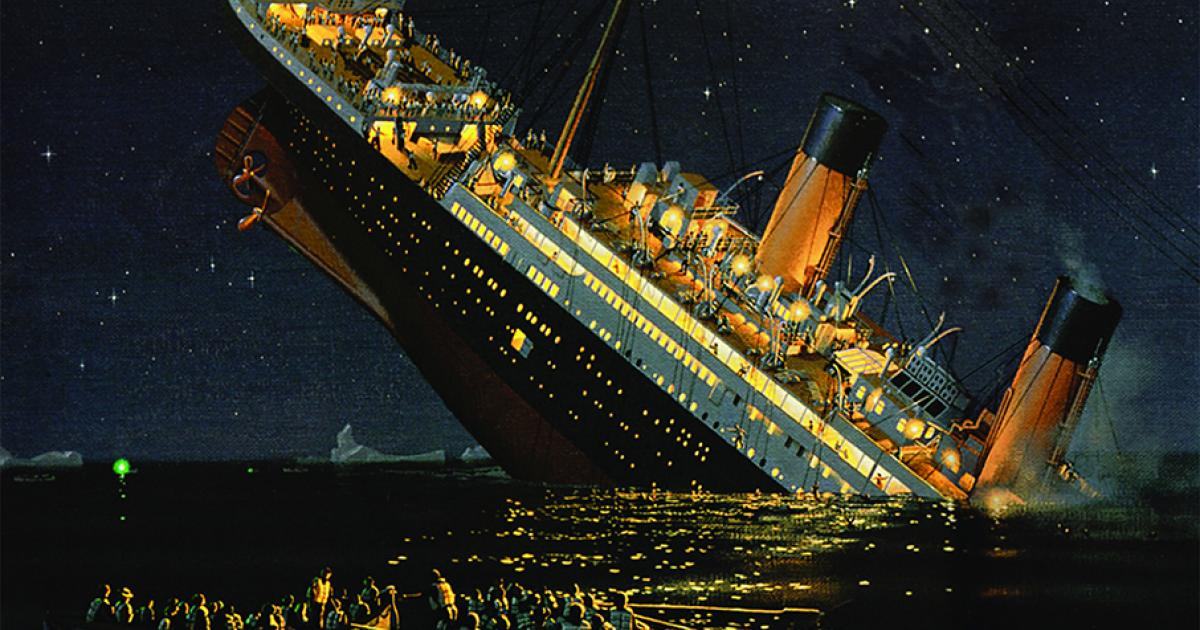


# I. Introduction

      Vụ chìm tàu Titanic là một trong những vụ đắm tàu khét tiếng nhất trong lịch sử.

   Vào ngày 15 tháng 4 năm 1912, trong chuyến đi đầu tiên của mình, chiếc RMS Titanic được coi là "không thể chìm" đã chìm sau khi va chạm với một tảng băng trôi trong chuyến hành trình từ Southampton đến New York City. Thật không may, không có đủ thuyền cứu sinh cho tất cả mọi người trên tàu, dẫn đến cái chết của 1502 trong số 2224 hành khách và thủy thủ đoàn.

   Mặc dù có một số yếu tố may mắn liên quan đến việc sống sót, nhưng có vẻ như một số nhóm người có nhiều khả năng sống sót hơn những nhóm khác.
   Trong đồ án này, chúng tôi xây dựng một mô hình dự đoán để trả lời câu hỏi: "loại người nào có nhiều khả năng sống sót hơn?" sử dụng dữ liệu hành khách (ví dụ: tên, tuổi, giới tính, tầng lớp kinh tế xã hội, v.v.).


# II. Data Preparation

# III. Exploratory Data Analysis

### 1. Loading data

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade pip
!pip install scikit-learn==1.1.2 scipy==1.9.1 missingpy==0.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, whic

In [ ]:
train_df=pd.read_csv("/content/drive/MyDrive/DS102/data/train.csv",index_col="PassengerId") #Convert column PassengerId to index
test_df=pd.read_csv("/content/drive/MyDrive/DS102/data/test.csv",index_col="PassengerId")


### 2. Preview data


In [ ]:
#preview data
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
# Describe data
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.377990
std,0.841838,14.181209,0.896760,0.981429,55.907576,0.485466
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


* Training data has 891 rows, while Test data has 418
* In training data, columns **Age**, **Embarked** and **Cabin** have missing values
* In test data, columns **Age**, **Fare** and **Cabin** have missing values \
=> Deal with this problem later in **Data Preprocessing** step below.

#### Types of Data
* **Categorical Data**: Pclass, Survived, Embarked, Pclass, Sibsp, Parch
>Embarked: Port of Embarkation - C= Cherbourg, Q= QueenTown, S= Southampton
* **Numerical Data**: Age, Fare

* **Missing values Data**: Age, Fare, Cabin, Embarked

In [ ]:
#Conver to Categorical datatype
cat_col=["Pclass","Survived","SibSp","Parch","Embarked"]
def convert(df,col):
    for col in col:
        df[col]=df[col].astype("category")
convert(train_df,cat_col)
convert(test_df,cat_col)

In [ ]:
# New data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(5), float64(2), object(4)
memory usage: 54.2+ KB


### Data Analysis

#### Distribution of numerical data


In [ ]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


#### Distribution of categorical data


In [ ]:
train_df.describe(include="category")

,Survived,Pclass,SibSp,Parch,Embarked
count,891,891,891,891,889
unique,2,3,7,7,3
top,0,3,0,0,S
freq,549,491,608,678,644


 ### **Target Variable: Survived**

In [ ]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In training data, we have:
* 549 people died
* 342 people survived

In [ ]:
# Proportion of Survived column
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


<Axes: xlabel='Survived', ylabel='count'>

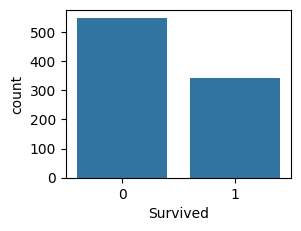

In [ ]:
plt.subplot(2,2,1)
sns.countplot(data=train_df,x='Survived')

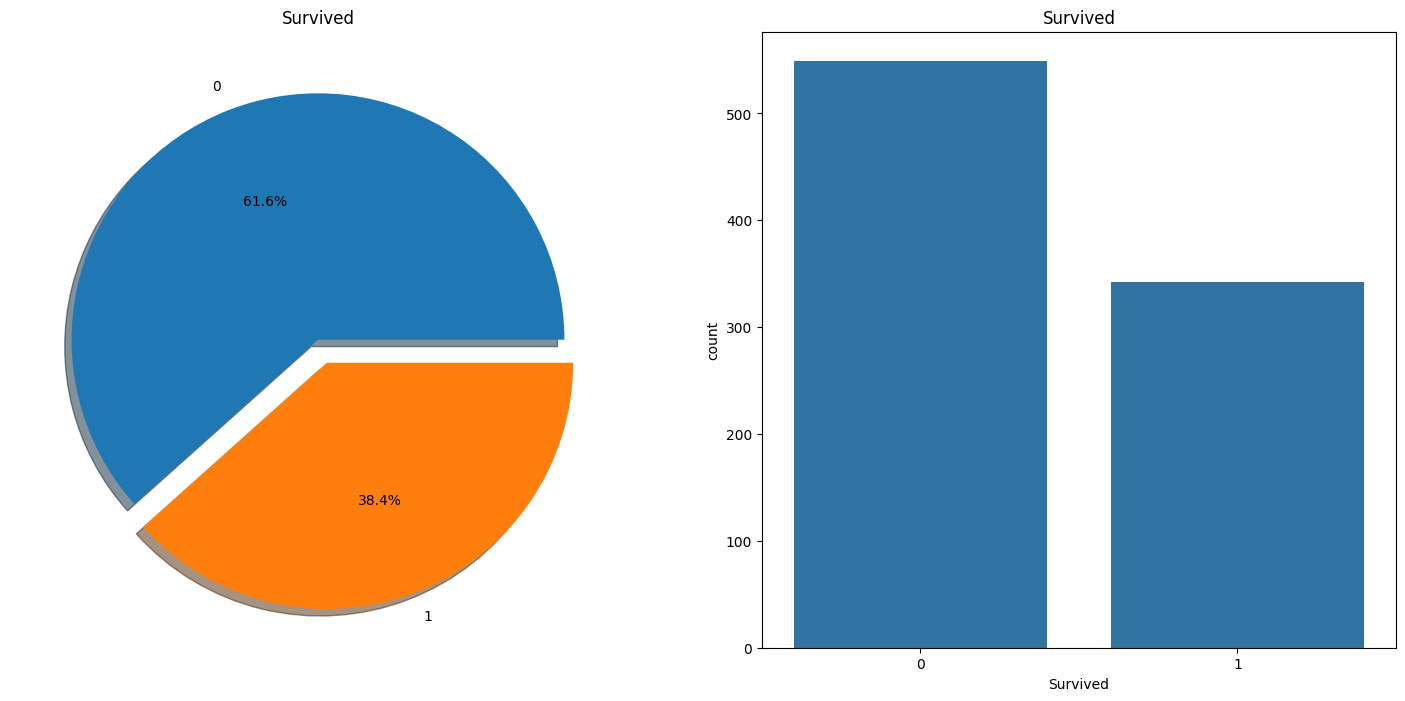

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data=train_df,x='Survived')
ax[1].set_title('Survived')
plt.show()

* About **61.6%** people on Titanic died, while **38.4%** people survived

 ### **Variable: Sex**


In [ ]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In training data, we have:
* 577 males
* 314 females

In [ ]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


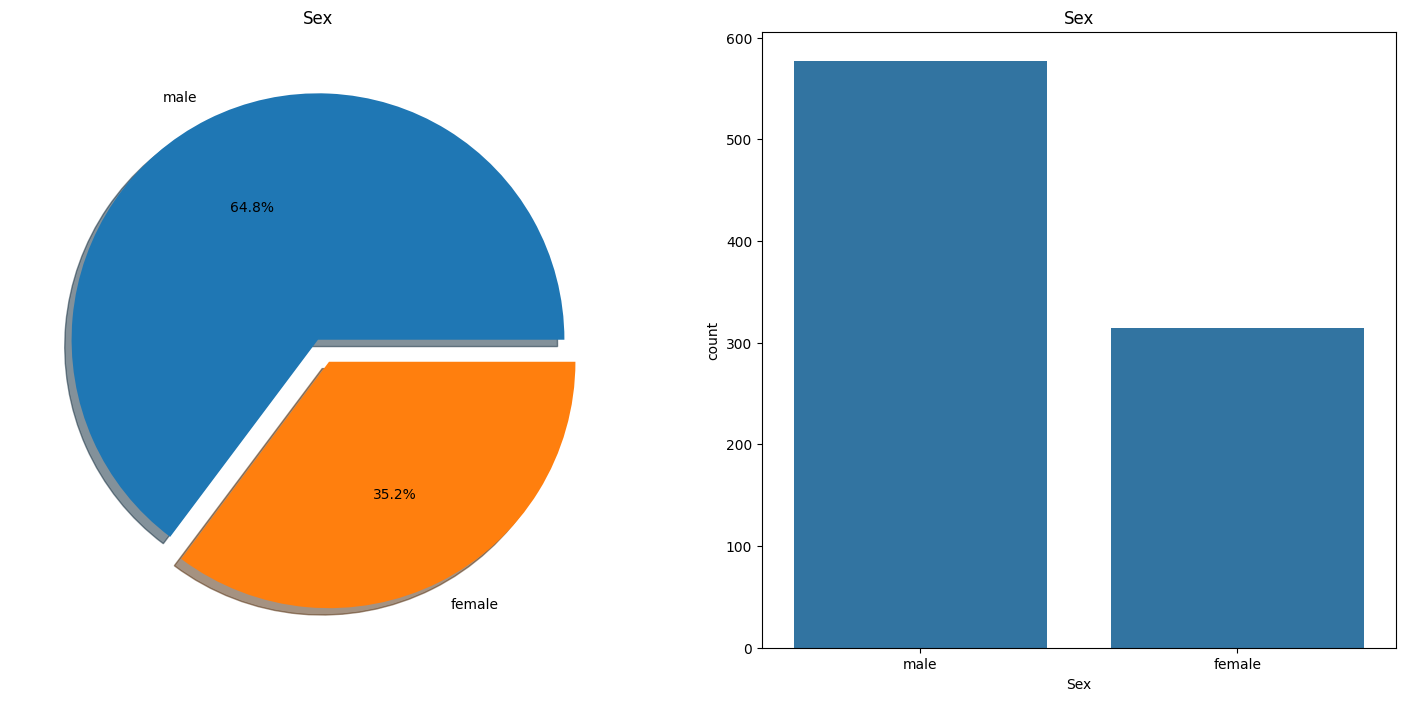

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Sex')
ax[0].set_ylabel('')
sns.countplot(data=train_df,x='Sex')
ax[1].set_title('Sex')
plt.show()

* In training data, **64.8%** are male, while **35.2%** others are female

 ### **Variable: Embarked**


In [ ]:
train_df['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


In [ ]:
train_df['Embarked'].value_counts(normalize=True).to_frame()

,Embarked
S,0.724409
C,0.188976
Q,0.086614


In training data, we can see that:
- 72,4% people in Titanic came from Southamton
- 19% from Cherbourg
- 8,6% from Queen

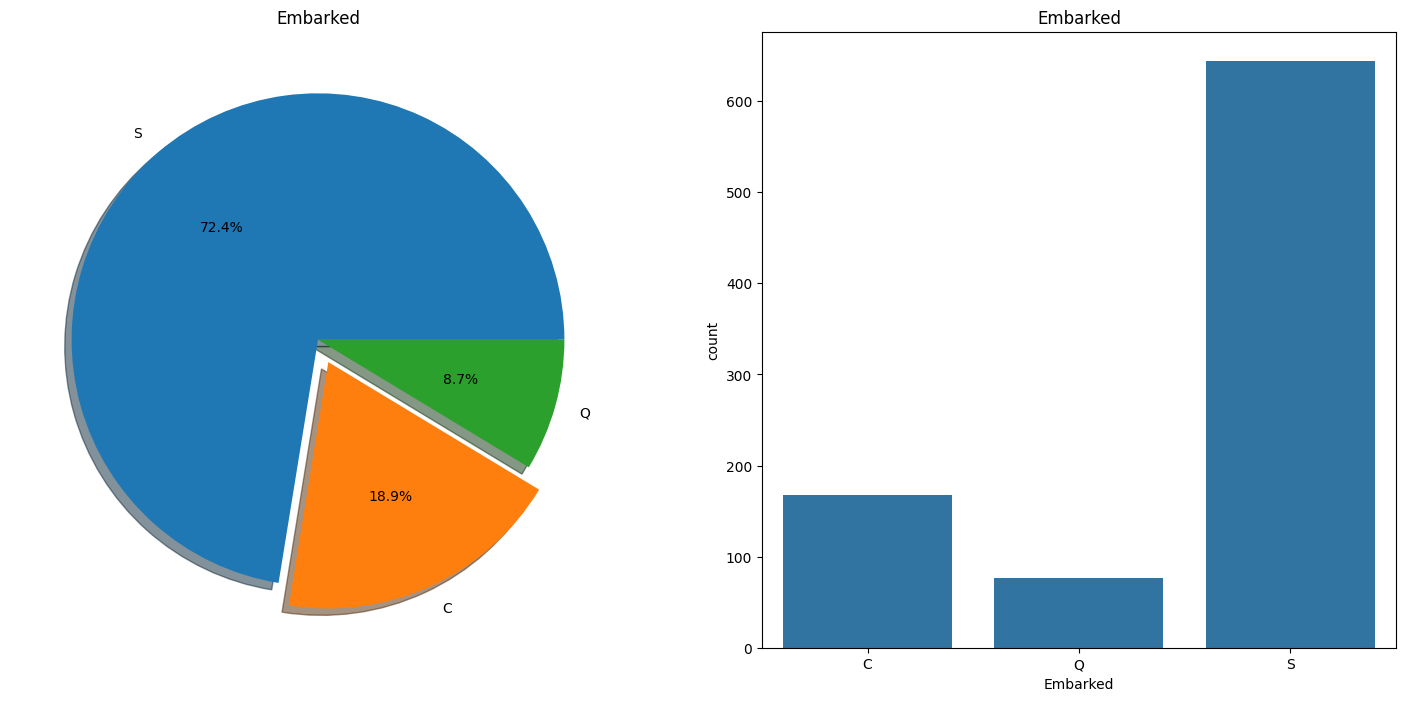

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
explode = [0, 0.1, 0]
train_df['Embarked'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Embarked')
ax[0].set_ylabel('')

# Plotting the count plot for 'Embarked'
sns.countplot(data=train_df, x='Embarked', ax=ax[1])
ax[1].set_title('Embarked')

# Show the plots
plt.show()

 ### **Variable: Pclass**

In [ ]:
train_df['Pclass'].value_counts().to_frame()

,Pclass
3,491
1,216
2,184


In [ ]:
train_df['Pclass'].value_counts(normalize=True).to_frame()

,Pclass
3,0.551066
1,0.242424
2,0.206510


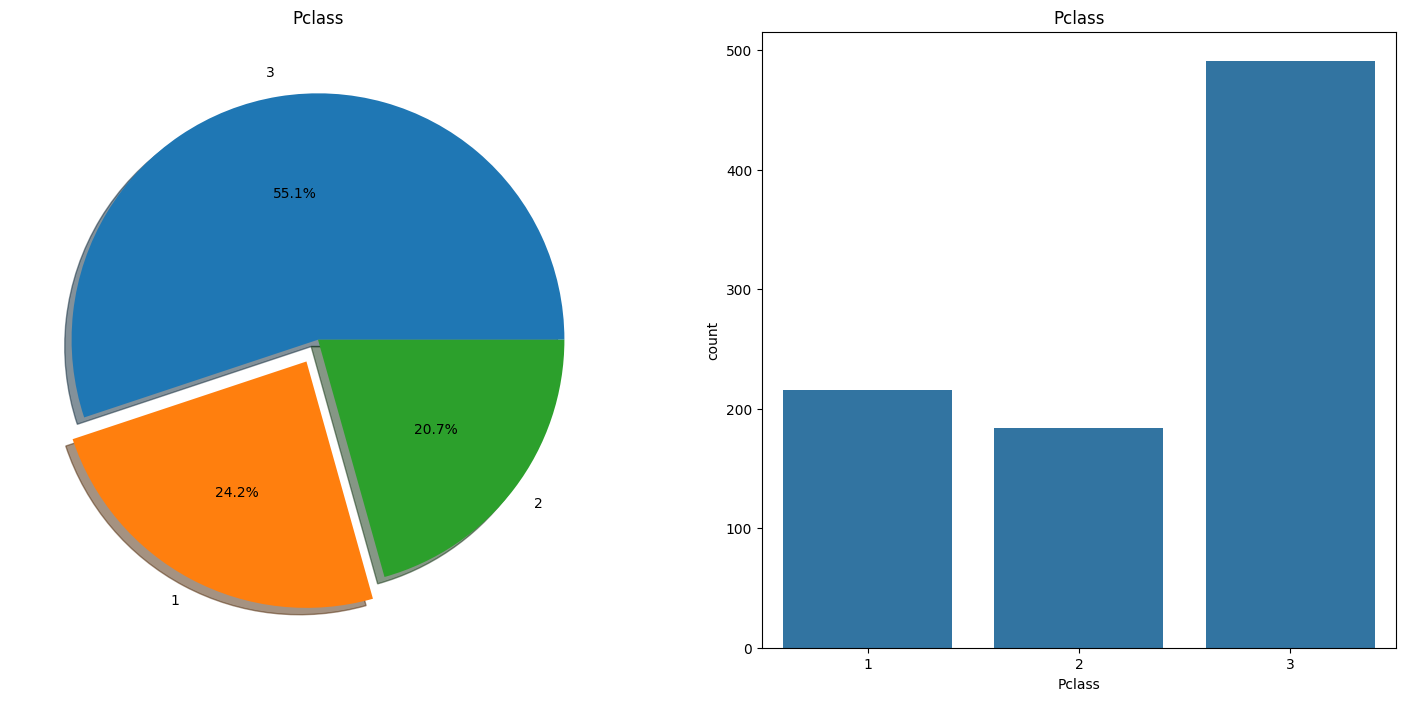

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
explode = [0, 0.1, 0]
train_df['Pclass'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pclass')
ax[0].set_ylabel('')

# Plotting the count plot for 'Pclass'
sns.countplot(data=train_df, x='Pclass', ax=ax[1])
ax[1].set_title('Pclass')

# Show the plots
plt.show()


 ### **Variable: Parch**



In [ ]:
train_df['Parch'].value_counts().to_frame()

,Parch
0,678
1,118
2,80
3,5
5,5
4,4
6,1


In [ ]:
train_df['Parch'].value_counts(normalize=True).to_frame()

,Parch
0,0.760943
1,0.132435
2,0.089787
3,0.005612
5,0.005612
4,0.004489
6,0.001122


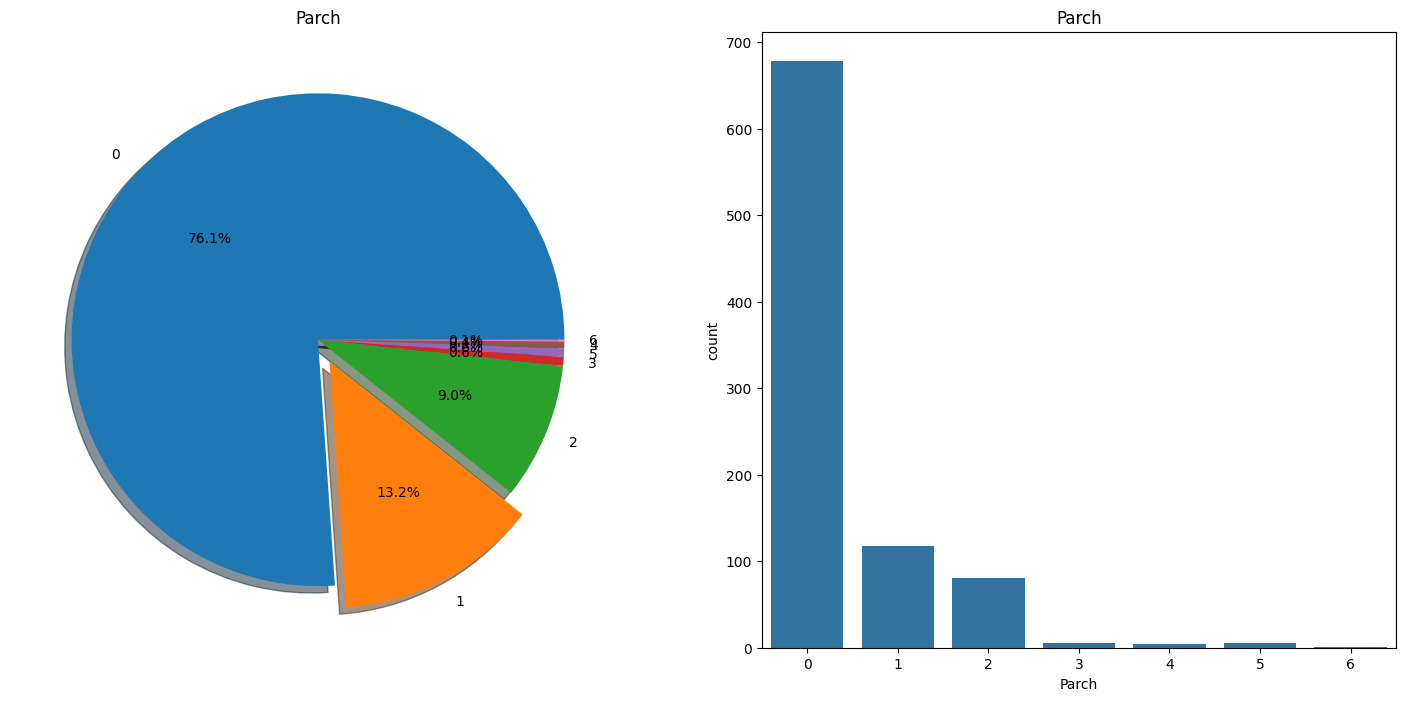

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
explode = [0, 0.1, 0,0,0,0,0]
train_df['Parch'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Parch')
ax[0].set_ylabel('')

# Plotting the count plot for 'Parch'
sns.countplot(data=train_df, x='Parch', ax=ax[1])
ax[1].set_title('Parch')

# Show the plots
plt.show()

### **Variable: SibSp**


In [ ]:
train_df['SibSp'].value_counts().to_frame()

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
train_df['SibSp'].value_counts(normalize=True).to_frame()

,SibSp
0,0.682379
1,0.234568
2,0.031425
4,0.020202
3,0.017957
8,0.007856
5,0.005612


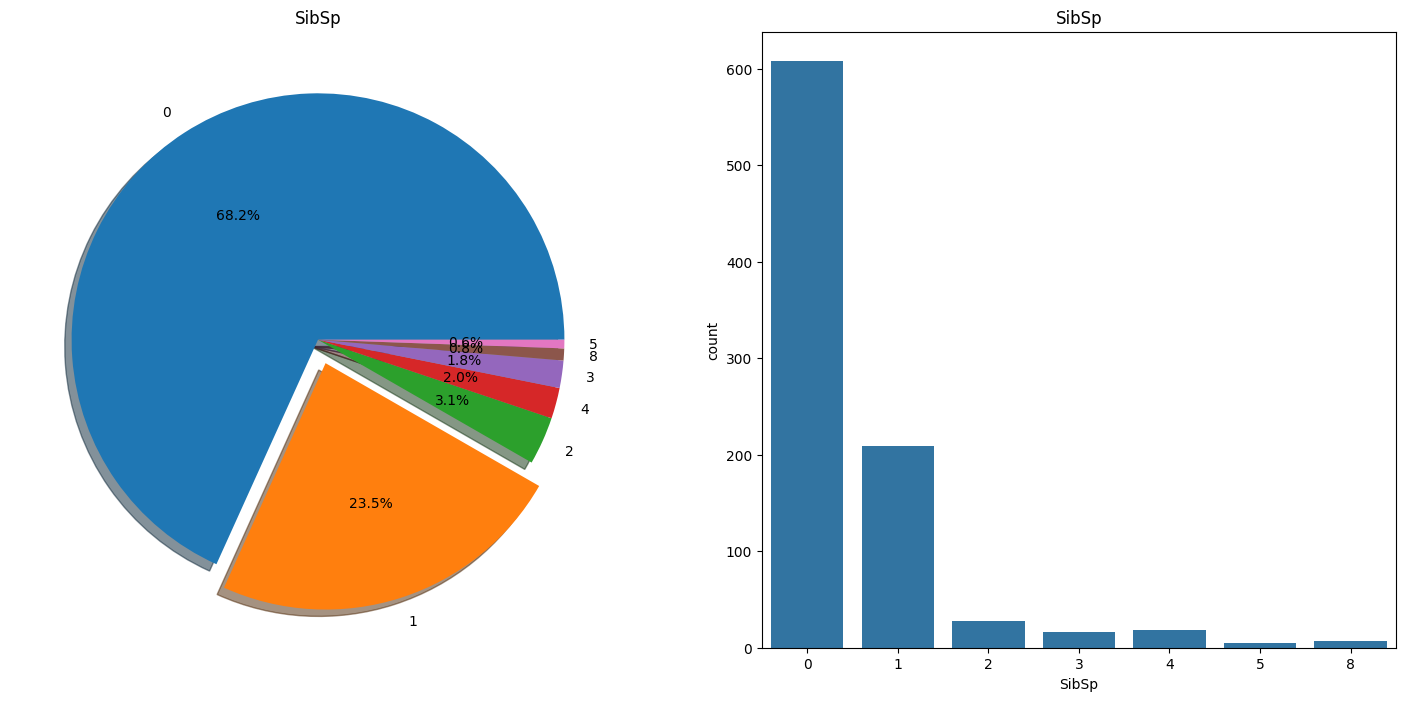

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
explode = [0, 0.1, 0,0,0,0,0]
train_df['SibSp'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('SibSp')
ax[0].set_ylabel('')

# Plotting the count plot for 'SibSp'
sns.countplot(data=train_df, x='SibSp', ax=ax[1])
ax[1].set_title('SibSp')

# Show the plots
plt.show()

### **Variable: Age**


In [ ]:
train_df['Age'].value_counts().to_frame()

,Age
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1
23.50,1


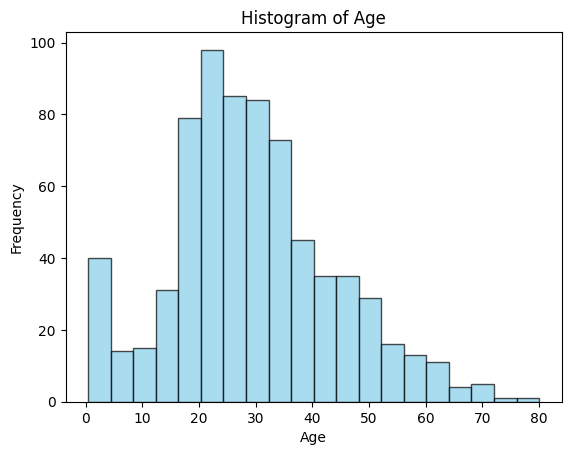

In [ ]:

plt.hist(train_df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

### **Variable: Fare**


In [ ]:
train_df['Fare'].value_counts().to_frame()

,Fare
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
35.0000,1
28.5000,1
6.2375,1
14.0000,1


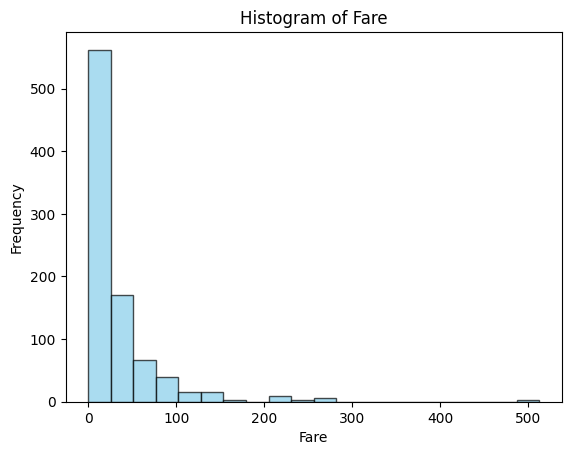

In [ ]:

plt.hist(train_df['Fare'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')
plt.show()


### **Survival Abilities of Categorical Data**


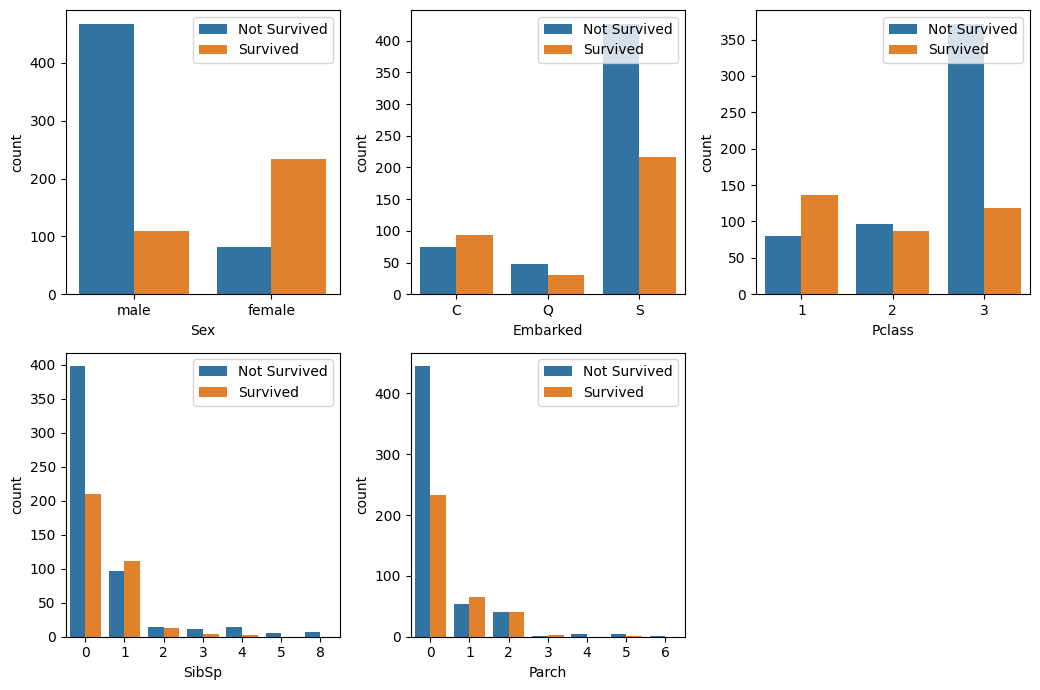

In [ ]:
# Plot survival abilities for categorical data
f_cols=['Sex','Embarked','Pclass','SibSp','Parch']

rows=2
cols=3

# Create subplot for each columns
fig,ax=plt.subplots(rows,cols,figsize=(cols*3.5,rows*3.5))

for r in range (0,rows):
    for c in range (0,cols):
        i = (r*cols) + c
        if i < len(f_cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = f_cols[i], hue = 'Survived',  ax = ax_i)
            ax_i.legend(title='',loc = "upper right", labels = ["Not Survived","Survived"])

ax.flat[-1].set_visible(False) # Delete an empty box, because there're 5 categorical columns, not 6
plt.tight_layout() # Tight layout

After plotting the data, we can see that: \
*

# IV. Data Preprocessing

###  Feature Engineering

In [ ]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
#hàm extract danh hiệu miss, mr đằng trước
import re
def extract_title(name):
    p = re.compile(r",([\w\s].+)\.")
    return p.search(name).groups(1)[0].strip()
train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name) ) #dat ten cot moi la title, chua danh hieu da extract


In [ ]:
test_df['Title']=test_df['Name'].apply(lambda name: extract_title(name) )


In [ ]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
train_df['Title']=train_df['Title'].apply(lambda title: group_title(title))
test_df['Title']=test_df['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

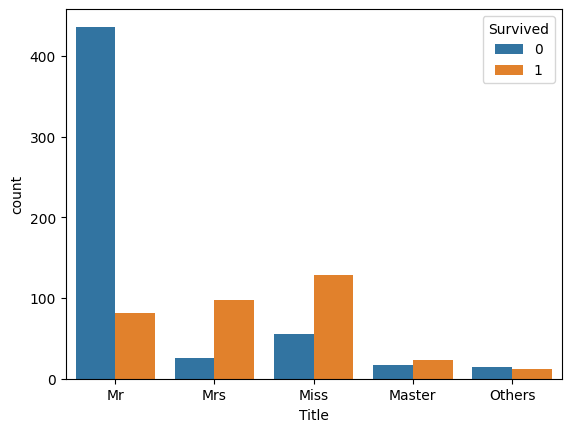

In [ ]:
sns.countplot(data=train_df, x='Title',hue = 'Survived')

Almost Mr die

In [ ]:
def process_ticket_column(df):
    Ticket = []
    for i in df['Ticket']:
        if not i.isdigit():
            Ticket.append(i.replace(".", "").replace("/", "").strip().split(' ')[0])  # Lấy tiền tố
        else:
            Ticket.append("X")
    df["Ticket"] = Ticket
    return df

# Áp dụng hàm cho train_df
train_df = process_ticket_column(train_df)

# Áp dụng hàm cho test_df
test_df = process_ticket_column(test_df)

# Hiển thị thông tin của cột 'Ticket' trong train_df
print(train_df["Ticket"].describe())


count     891
unique     31
top         X
freq      661
Name: Ticket, dtype: object


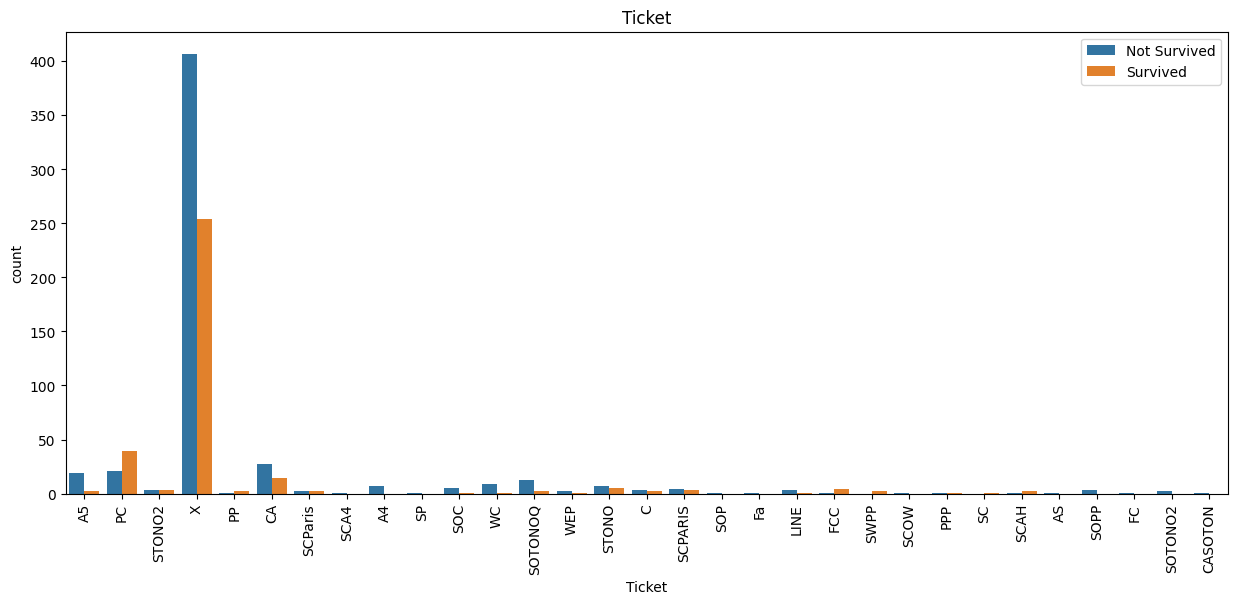

In [ ]:
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

# Plot count for each unique ticket value
sns.countplot(data=train_df, x='Ticket', hue='Survived')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
plt.title('Ticket')
plt.show()

In [ ]:
def group_ticket(ticket):
  if ticket in ['X','A5','PC','CA']:
        return ticket
  else:
        return "Others"
train_df['Ticket']=train_df['Ticket'].apply(lambda ticket: group_ticket(ticket))
test_df['Ticket']=test_df['Ticket'].apply(lambda ticket: group_ticket(ticket))

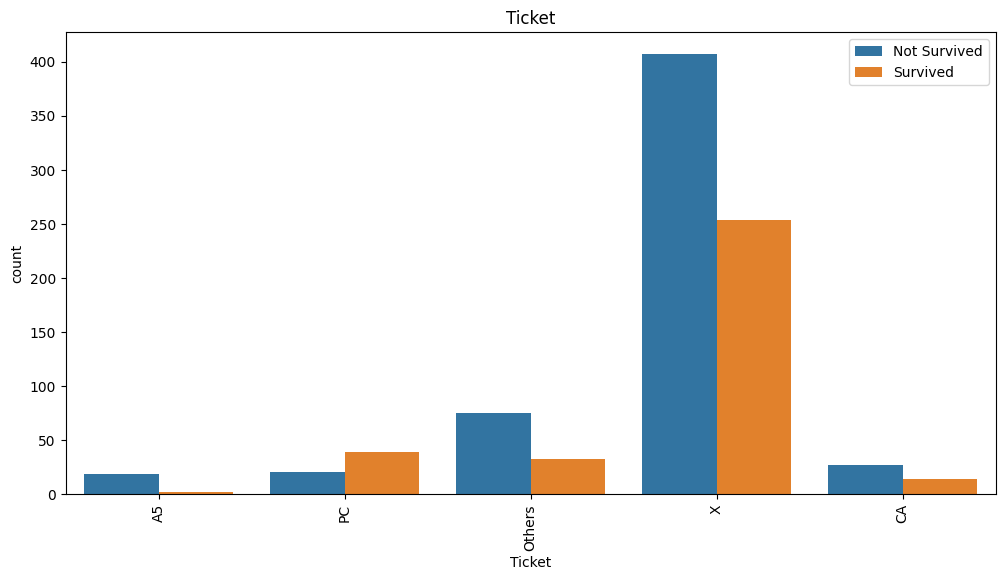

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot count for each unique ticket value
sns.countplot(data=train_df, x='Ticket', hue='Survived')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
plt.title('Ticket')
plt.show()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
 11  Title     891 non-null    object  
dtypes: category(5), float64(2), object(5)
memory usage: 61.1+ KB


In [ ]:
#Family size = combine parch and sibsp
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [ ]:
train_df['Family_Size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_Size, dtype: int64

In [ ]:
#phan loai gia dinh theo so luong thanh vien
train_df['Family_Cat']=pd.cut(train_df['Family_Size'],bins=[0,1,4,7,20],labels=['Single','Small','Medium','Large'])
#0-1: single; 1-4: small; 4-7: medium; 7-20:large
test_df['Family_Cat']=pd.cut(test_df['Family_Size'],bins=[0,1,4,7,20],labels=['Single','Small','Medium','Large'])

In [ ]:
#them column mới là Alone, với 0 là Không đi một mình, 1 là đi một mình
train_df['Alone'] = 1
train_df.loc[train_df['Family_Size'] > 1, 'Alone'] = 0

test_df['Alone'] = 1
test_df.loc[test_df['Family_Size'] > 1, 'Alone'] = 0

In [ ]:
#cast Alone data type:
train_df['Alone'] = train_df['Alone'].astype(int)
test_df['Alone'] = test_df['Alone'].astype(int)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    category
 11  Title        891 non-null    object  
 12  Family_Size  891 non-null    int64   
 13  Family_Cat   891 non-null    category
 14  Alone        891 non-null    int64   
dtypes: category(6), float64(2), int64(2), object(5)
memory usage: 76.1+ KB


<Axes: xlabel='Family_Cat', ylabel='count'>

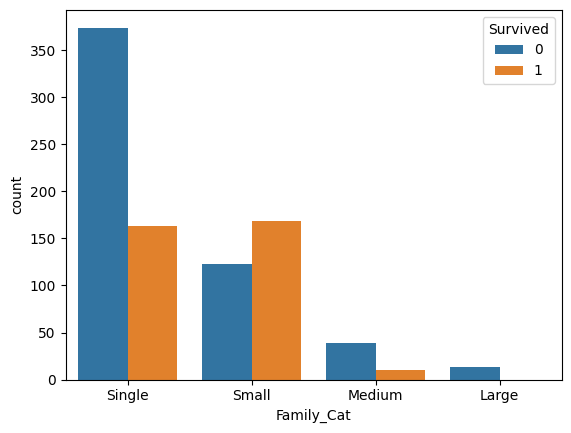

In [ ]:
sns.countplot(data=train_df,x="Family_Cat",hue='Survived')

<Axes: xlabel='Alone', ylabel='count'>

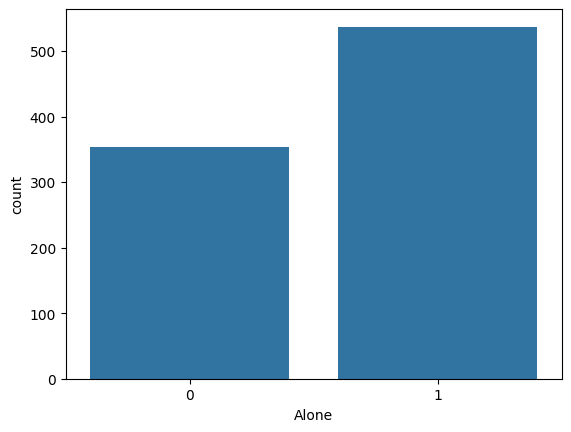

In [ ]:
sns.countplot(data=train_df,x="Alone")

### Data Wrangling

In [ ]:
num_features=['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_Cat','Alone','Ticket']
features_cols = num_features + cat_features

In [ ]:
def missing_display(df,features_cols):
    n_rows=df.shape[0]
    for col in features_cols:
        missing_count=df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values")
missing_display(train_df,features_cols)
missing_display(test_df,features_cols)

Age has 19.87% missing values
Embarked has 0.22% missing values
Age has 20.57% missing values
Fare has 0.24% missing values


In [ ]:


print(f"Missing data in training set: \n")
missing_display(train_df,features_cols)
print(f"Missing data in test set: \n")
missing_display(test_df,features_cols)
def missing_display(df,features_cols):
    n_rows=df.shape[0]
    for col in features_cols:
        missing_count=df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values")

Missing data in training set: 

Age has 19.87% missing values
Embarked has 0.22% missing values
Missing data in test set: 

Age has 20.57% missing values
Fare has 0.24% missing values


#### Filling missing value


In [ ]:
missing_display(train_df,features_cols)

Age has 19.87% missing values
Embarked has 0.22% missing values


In [ ]:
missing_display(test_df,features_cols)

Age has 20.57% missing values
Fare has 0.24% missing values


####1. Use Simple Imputer

In [ ]:
# preprocess pipeline using simple imputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
preprocessor.fit(train_df)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat', 'Alone', 'Ticket'])])

In [ ]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'Family_Size', 'Family_Cat',
       'Alone'],
      dtype='object')

In [ ]:

# Assuming train_df and test_df are your DataFrames, and features_cols is a list of column names
preprocessed_X_df = pd.DataFrame(preprocessor.transform(train_df[features_cols]), columns=num_features + cat_features)

preprocessed_X_test_df = pd.DataFrame(preprocessor.transform(test_df[features_cols]), columns=num_features + cat_features)


In [ ]:
preprocessed_X_df.head(3)

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Alone,Ticket
0,-0.565736,-0.502445,male,3,S,Mr,Small,0,A5
1,0.663861,0.786845,female,1,C,Mrs,Small,0,PC
2,-0.258337,-0.488854,female,3,S,Miss,Single,1,Others


In [ ]:
preprocessed_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         891 non-null    object
 1   Fare        891 non-null    object
 2   Sex         891 non-null    object
 3   Pclass      891 non-null    object
 4   Embarked    891 non-null    object
 5   Title       891 non-null    object
 6   Family_Cat  891 non-null    object
 7   Alone       891 non-null    object
 8   Ticket      891 non-null    object
dtypes: object(9)
memory usage: 62.8+ KB


In [ ]:
preprocessed_X_test_df.head()

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Alone,Ticket
0,0.394887,-0.490783,male,3,Q,Mr,Single,1,X
1,1.35551,-0.507479,female,3,S,Mrs,Small,0,X
2,2.508257,-0.453367,male,2,Q,Mr,Single,1,X
3,-0.181487,-0.474005,male,3,S,Mr,Single,1,X
4,-0.565736,-0.401017,female,3,S,Mrs,Small,0,X


### Label Encoder for Categorical Feature

In [ ]:
cat_features

['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat', 'Alone', 'Ticket']

In [ ]:
preprocessed_X_df['Alone'].value_counts()

1    537
0    354
Name: Alone, dtype: int64

In [ ]:
preprocessed_X_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
preprocessed_X_df['Family_Cat'].value_counts()

Single    537
Small     292
Medium     49
Large      13
Name: Family_Cat, dtype: int64

In [ ]:
oh_enc = OneHotEncoder(handle_unknown='ignore')
pd.DataFrame(oh_enc.fit_transform(preprocessed_X_df[['Title']]).toarray()).head()

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [ ]:
le_enc = LabelEncoder()

pd.DataFrame(le_enc.fit_transform(preprocessed_X_df['Title'])).head()

,0
0,2
1,3
2,1
3,3
4,2


In [ ]:
print(le_enc.classes_)

['Master' 'Miss' 'Mr' 'Mrs' 'Others']


In [ ]:


for cat_col in ['Sex', 'Embarked', 'Title','Family_Cat','Ticket']:
    le_enc = LabelEncoder()
    preprocessed_X_df[cat_col] = le_enc.fit_transform(preprocessed_X_df[cat_col])
    preprocessed_X_test_df[cat_col] = le_enc.transform(preprocessed_X_test_df[cat_col])

preprocessed_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         891 non-null    object
 1   Fare        891 non-null    object
 2   Sex         891 non-null    int64 
 3   Pclass      891 non-null    object
 4   Embarked    891 non-null    int64 
 5   Title       891 non-null    int64 
 6   Family_Cat  891 non-null    int64 
 7   Alone       891 non-null    object
 8   Ticket      891 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 62.8+ KB


In [ ]:
preprocessed_X_test_df.head()

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Alone,Ticket
0,0.394887,-0.490783,1,3,1,2,2,1,4
1,1.35551,-0.507479,0,3,2,3,3,0,4
2,2.508257,-0.453367,1,2,1,2,2,1,4
3,-0.181487,-0.474005,1,3,2,2,2,1,4
4,-0.565736,-0.401017,0,3,2,3,3,0,4


In [ ]:
preprocessed_X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         418 non-null    object
 1   Fare        418 non-null    object
 2   Sex         418 non-null    int64 
 3   Pclass      418 non-null    object
 4   Embarked    418 non-null    int64 
 5   Title       418 non-null    int64 
 6   Family_Cat  418 non-null    int64 
 7   Alone       418 non-null    object
 8   Ticket      418 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 29.5+ KB


In [ ]:
def cast_types(df):
    df['Age'] = df['Age'].astype(float)
    df['Fare'] = df['Fare'].astype(float)
    df['Pclass'] = df['Pclass'].astype(int)
    #df['Family_Size'] = df['Family_Size'].astype(int)
    df['Alone'] = df['Alone'].astype(int)
    return df

In [ ]:
preprocessed_X_df = cast_types(preprocessed_X_df)
preprocessed_X_test_df = cast_types(preprocessed_X_test_df)

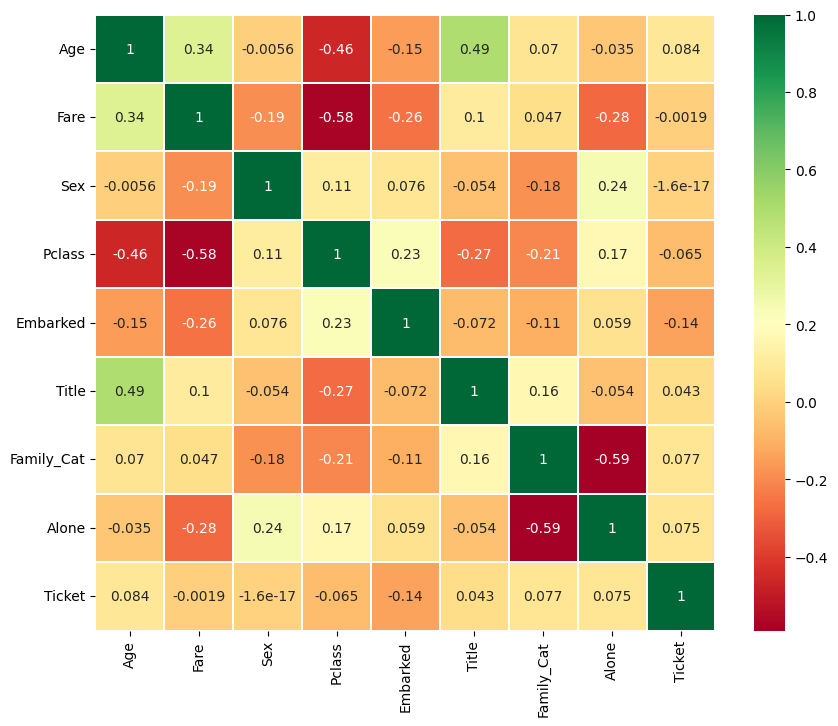

In [ ]:
sns.heatmap(preprocessed_X_test_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Split Data

In [ ]:
y_train = train_df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(preprocessed_X_df, y_train, test_size=0.2)

In [ ]:
X_train.shape, X_val.shape

((712, 9), (179, 9))

In [ ]:
 y_train.shape

(712,)

### Train and Evaluate

In [ ]:
# Pre-Processing
from sklearn.preprocessing import PolynomialFeatures

# Model Selection
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV


# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier,\
 GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn import tree
from xgboost import XGBClassifier

from sklearn import metrics

In [ ]:
seed = 2023
models = [
  LogisticRegression(solver='liblinear',penalty='l2',max_iter=10000),
  LinearSVC(random_state=seed,max_iter=120000),
  SVC(random_state=seed),
  KNeighborsClassifier(metric='minkowski', p=4),
  DecisionTreeClassifier(criterion = 'entropy', max_depth = 8,random_state=seed),
  RandomForestClassifier(random_state=seed),
  ExtraTreesClassifier(),
  AdaBoostClassifier(),
  XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed),

  GradientBoostingClassifier()
]

In [ ]:
from sklearn.model_selection import StratifiedKFold

def baseline_result(models, X, y, metrics, cv=15, plot_results=True):
  kfold = StratifiedKFold(cv,shuffle=True,random_state=seed)
  entries=[]
  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model,X_train,y_train,scoring=metrics,cv=kfold)
    for kfold_idx,score in enumerate(scores):
      entries.append((model_name,kfold_idx,score))

  res_df = pd.DataFrame(entries,columns = ['Model Name','Fold Index','Accuracy Score'])
  results = res_df.groupby('Model Name')['Accuracy Score'].mean().reset_index()
  results.columns = ['Model Name', 'Mean']

  results.sort_values(by=['Mean'],ascending = False, inplace = True )

  return results
result = baseline_result(models, X_train,y_train, metrics='accuracy', cv=15, plot_results=True)
print(result)

                   Model Name      Mean
3  GradientBoostingClassifier  0.835550
8                         SVC  0.834220
0          AdaBoostClassifier  0.825857
9               XGBClassifier  0.821395
5                   LinearSVC  0.814509
7      RandomForestClassifier  0.811525
6          LogisticRegression  0.808924
1      DecisionTreeClassifier  0.805999
4        KNeighborsClassifier  0.801773
2        ExtraTreesClassifier  0.797547


Text(0, 0.5, 'Algorithm')

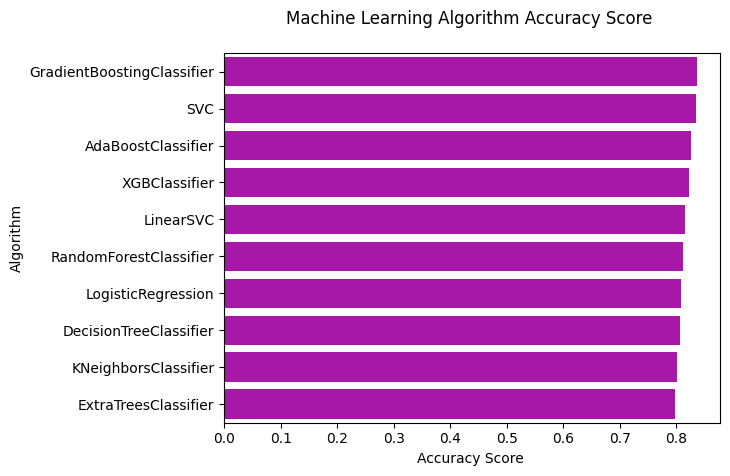

In [ ]:
sns.barplot(x='Mean', y = 'Model Name', data = result, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score ')
plt.ylabel('Algorithm')

In [ ]:
import time, datetime
from sklearn.model_selection import RandomizedSearchCV

def train_model(X, y, model, kfold, params):
    print("\n")
    print(f"{model.__class__.__name__}: Training Started")
    start_time = time.time()
    clf = RandomizedSearchCV(model,
                       param_distributions=params,  # Thay đổi param_distributions thành param_grid
                       cv=kfold,
                       n_jobs=-1,
                       verbose=5)
    clf.fit(X, y)

    # Best Params
    best_score, best_params = round(clf.best_score_, 2), clf.best_params_

    print('Best Score: ', best_score)
    print('Best Hyperparameters: ', best_params)
    print(f"Total Time: {datetime.timedelta(seconds=(time.time() - start_time)).total_seconds():.2f} s\n")
    return best_score, best_params, clf.best_estimator_


In [ ]:
import tqdm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

model_list = [
    (GradientBoostingClassifier(), {
        'n_estimators': [4, 16, 48, 96, 144, 192],
        'learning_rate': [0.01, 0.04, 0.08, 0.12],
        'max_depth': [4, 8, 12, 16],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [4, 8, 12, 16],
        'min_samples_leaf': [4, 8, 16]
    }),
    (RandomForestClassifier(), {
        'n_estimators': [4, 16, 48, 96, 144, 192],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [5, 4, 8, 12, 16, 20],
        'min_samples_leaf': [5, 10, 15, 20],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    }),

    (XGBClassifier(), {
        'n_estimators': [4, 16, 48, 96, 144, 192],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [1, 2, 4, 5, 7, 8, 10],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 1, 5],
        'reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 100],
        'reg_lambda': [0, 1e-5, 1e-2, 0.1, 1, 100]
    }),
    (DecisionTreeClassifier(), {
        'max_depth': [4, 8, 12, 16],
        'min_samples_split': [4, 8, 12, 16],
        'min_samples_leaf': [4, 8, 12, 16],
        'criterion': ['gini', 'entropy']
    }),
]


kfolds = [5,10,15]
final_scores, best_models, model_params = {}, {}, {}

for model in tqdm.tqdm(model_list):
    print("================")
    print(f"Working with {model[0].__class__.__name__}")
    print("================")
    for kfold in kfolds:
        model_name = model[0].__class__.__name__
        score, best_params, best_model = train_model(X_train, y_train, model[0], kfold, model[1])
        final_scores[model_name] = score
        best_models[model_name] = best_model
        model_params[model_name] = best_params

#for model, param_dist in model_list:
 # print("===============================")
  #print(f"Working with {model.__class__.__name__} ")
  #print("===============================")
  #for kfold in kfolds:
   # train_model(X_train, y_train, model, kfold, param_dist)

  0%|          | 0/4 [00:00<?, ?it/s]

Working with GradientBoostingClassifier


GradientBoostingClassifier: Training Started
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.84
Best Hyperparameters:  {'subsample': 1.0, 'n_estimators': 192, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_depth': 8, 'learning_rate': 0.01}
Total Time: 14.44 s



GradientBoostingClassifier: Training Started
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score:  0.84
Best Hyperparameters:  {'subsample': 1.0, 'n_estimators': 96, 'min_samples_split': 4, 'min_samples_leaf': 16, 'max_depth': 8, 'learning_rate': 0.04}
Total Time: 22.58 s



GradientBoostingClassifier: Training Started
Fitting 15 folds for each of 10 candidates, totalling 150 fits


 25%|██▌       | 1/4 [01:16<03:49, 76.45s/it]

Best Score:  0.85
Best Hyperparameters:  {'subsample': 1.0, 'n_estimators': 144, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_depth': 16, 'learning_rate': 0.01}
Total Time: 39.43 s

Working with RandomForestClassifier


RandomForestClassifier: Training Started
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.84
Best Hyperparameters:  {'n_estimators': 144, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
Total Time: 6.90 s



RandomForestClassifier: Training Started
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score:  0.84
Best Hyperparameters:  {'n_estimators': 96, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}
Total Time: 11.22 s



RandomForestClassifier: Training Started
Fitting 15 folds for each of 10 candidates, totalling 150 fits


 50%|█████     | 2/4 [01:57<01:51, 55.55s/it]

Best Score:  0.84
Best Hyperparameters:  {'n_estimators': 96, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
Total Time: 22.79 s

Working with XGBClassifier


XGBClassifier: Training Started
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.84
Best Hyperparameters:  {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 192, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}
Total Time: 1.53 s



XGBClassifier: Training Started
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score:  0.85
Best Hyperparameters:  {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 4, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 1, 'colsample_bytree': 0.9}
Total Time: 3.74 s



XGBClassifier: Training Started
Fitting 15 folds for each of 10 candidates, totalling 150 fits


 75%|███████▌  | 3/4 [02:09<00:35, 35.72s/it]

Best Score:  0.83
Best Hyperparameters:  {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 192, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 5, 'colsample_bytree': 0.9}
Total Time: 6.84 s

Working with DecisionTreeClassifier


DecisionTreeClassifier: Training Started
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.83
Best Hyperparameters:  {'min_samples_split': 8, 'min_samples_leaf': 8, 'max_depth': 4, 'criterion': 'gini'}
Total Time: 0.87 s



DecisionTreeClassifier: Training Started
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score:  0.83
Best Hyperparameters:  {'min_samples_split': 16, 'min_samples_leaf': 8, 'max_depth': 4, 'criterion': 'entropy'}
Total Time: 0.67 s



DecisionTreeClassifier: Training Started
Fitting 15 folds for each of 10 candidates, totalling 150 fits


100%|██████████| 4/4 [02:11<00:00, 32.95s/it]

Best Score:  0.84
Best Hyperparameters:  {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 4, 'criterion': 'entropy'}
Total Time: 0.75 s



In [ ]:
final_scores, best_models, model_params

({'GradientBoostingClassifier': 0.85,
  'RandomForestClassifier': 0.84,
  'XGBClassifier': 0.83,
  'DecisionTreeClassifier': 0.84},
 {'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.01, max_depth=16,
                             min_samples_leaf=16, min_samples_split=12,
                             n_estimators=144),
  'RandomForestClassifier': RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                         min_samples_leaf=10, min_samples_split=5,
                         n_estimators=96),
  'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.9, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=5, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.01, max_bin=N

In [ ]:
y_test = test_df['Survived']

In [ ]:
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto',
                                max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                                min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False,
                                random_state=None, verbose=0, warm_start=False)


forest.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=1)

In [ ]:
y_train = train_df['Survived']

In [ ]:
y_forest = forest.predict(preprocessed_X_df)
y_forest

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

forest_report = classification_report(y_forest,y_train)


print("Random Forest Classification Report:\n", forest_report)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       555
           1       0.92      0.94      0.93       336

    accuracy                           0.95       891
   macro avg       0.94      0.95      0.95       891
weighted avg       0.95      0.95      0.95       891



In [ ]:
forest_cf = pd.DataFrame(confusion_matrix(y_train,y_forest),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )
print(f"Confusion Matrix của Random Forest:\n",forest_cf)


Confusion Matrix của Random Forest:
               Predicted Not-Survived  Predicted Survived
Not-Survived                     529                  20
Survived                          26                 316


Confusion matrix, without normalization
[[529  20]
 [ 26 316]]
Normalized confusion matrix
[[0.96 0.04]
 [0.08 0.92]]


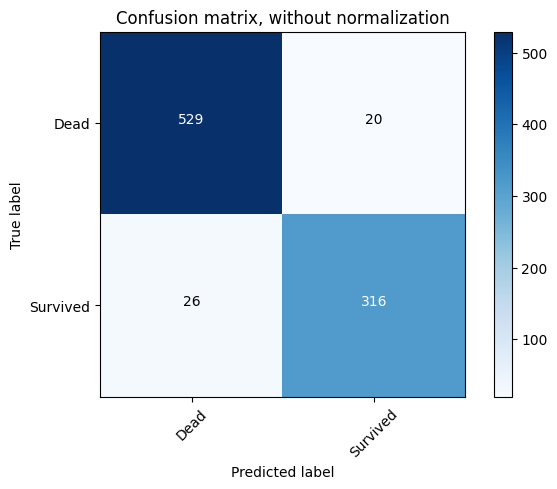

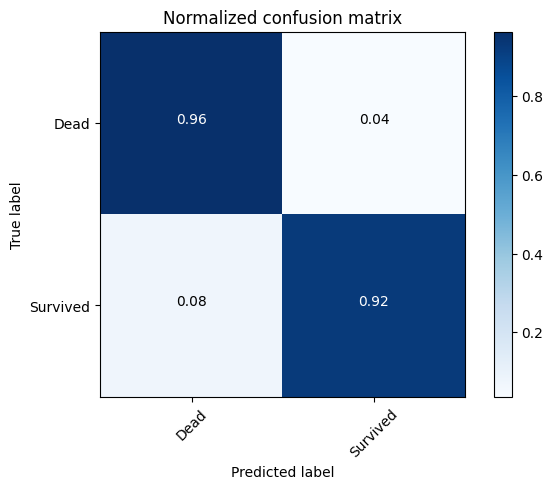

In [ ]:

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_forest)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
params = {
    'learning_rate': 0.04,
    'max_depth': 12,
    'min_samples_leaf': 16,
    'min_samples_split': 12,
    'n_estimators': 48,
    'subsample': 0.8
}

# Tạo và huấn luyện GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(**params)
gb_classifier.fit(preprocessed_X_df, y_train)

# Đánh giá hiệu suất trên tập kiểm thử
accuracy = gb_classifier.score(X_val, y_val)
print("Accuracy:", accuracy)

# Dự đoán và in báo cáo hiệu suất
y_gb = gb_classifier.predict(X_val)
gb_report = classification_report(y_val, y_gb)

print("Gradient Boosting Classifier Report:\n", gb_report)

Accuracy: 0.888268156424581
Gradient Boosting Classifier Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       126
           1       0.88      0.72      0.79        53

    accuracy                           0.89       179
   macro avg       0.89      0.84      0.86       179
weighted avg       0.89      0.89      0.88       179



In [ ]:
sv = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)

sv.fit(preprocessed_X_df,y_train)
sv.score(preprocessed_X_test_df,y_test)


0.7751196172248804

In [ ]:
y_svc= sv.predict(preprocessed_X_test_df)

svc_report = classification_report(y_test, y_svc)


print("Support Vector Machine Report:\n", svc_report)

Support Vector Machine Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       260
           1       0.70      0.72      0.71       158

    accuracy                           0.78       418
   macro avg       0.76      0.76      0.76       418
weighted avg       0.78      0.78      0.78       418



In [ ]:
xgb = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.1,
    max_delta_step=0,
    max_depth=3,
    min_child_weight=1,
    missing=0.0,
    n_estimators=100,
    n_jobs=1,
    nthread=None,
    objective='binary:logistic',
    random_state=0,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    seed=None,
    silent=True,
    subsample=1
)


# 2. Use 'Missingpy' - một thư viện dùng để fill missing data bằng cách train những feature còn lại

In [ ]:
!pip install missingpy

In [ ]:
train_data = train_df[features_cols ]
test_data = test_df[features_cols]
train_data.head(3)

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Alone,Ticket
PassengerId,,,,,,,,,
1,22.0,7.2500,male,3,S,Mr,Small,0,A5
2,38.0,71.2833,female,1,C,Mrs,Small,0,PC
3,26.0,7.9250,female,3,S,Miss,Single,1,Others


In [ ]:
le = LabelEncoder()

# Create copies of the DataFrames
train_data = train_data.copy()
test_data = test_data.copy()

for col in cat_features:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

train_data.head(3)


,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Alone,Ticket
PassengerId,,,,,,,,,
1,22.0,7.2500,1,2,2,2,3,0,0
2,38.0,71.2833,0,0,0,3,3,0,3
3,26.0,7.9250,0,2,2,1,2,1,2


In [ ]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [ ]:
from missingpy import MissForest
imputer = MissForest(
    criterion='squared_error',
    max_features=1.0
)

train_data = imputer.fit_transform(train_data)
test_data = imputer.fit_transform(test_data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2


In [ ]:
train_data = pd.DataFrame(train_data, columns=features_cols)
test_data = pd.DataFrame(test_data, columns=features_cols)

In [ ]:
missing_display(train_data,features_cols)
missing_display(test_data,features_cols)

In [ ]:
train_data['Age'] = train_data['Age'].astype(int)
train_data


,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Alone,Ticket
0,22,7.2500,1.0,2.0,2.0,2.0,3.0,0.0,0.0
1,38,71.2833,0.0,0.0,0.0,3.0,3.0,0.0,3.0
2,26,7.9250,0.0,2.0,2.0,1.0,2.0,1.0,2.0
3,35,53.1000,0.0,0.0,2.0,3.0,3.0,0.0,4.0
4,35,8.0500,1.0,2.0,2.0,2.0,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...
886,27,13.0000,1.0,1.0,2.0,4.0,2.0,1.0,4.0
887,19,30.0000,0.0,0.0,2.0,1.0,2.0,1.0,4.0
888,8,23.4500,0.0,2.0,2.0,1.0,3.0,0.0,2.0
889,26,30.0000,1.0,0.0,0.0,2.0,2.0,1.0,4.0


In [ ]:
train_data['Age'] = pd.cut(train_data['Age'],4)
test_data['Age'] = pd.cut(test_data['Age'],4)

In [ ]:


train_data['Age'] = le.fit_transform(train_data['Age'])
test_data['Age'] = le.fit_transform(test_data['Age'])
train_data

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Alone,Ticket
0,1,7.2500,1.0,2.0,2.0,2.0,3.0,0.0,0.0
1,1,71.2833,0.0,0.0,0.0,3.0,3.0,0.0,3.0
2,1,7.9250,0.0,2.0,2.0,1.0,2.0,1.0,2.0
3,1,53.1000,0.0,0.0,2.0,3.0,3.0,0.0,4.0
4,1,8.0500,1.0,2.0,2.0,2.0,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...
886,1,13.0000,1.0,1.0,2.0,4.0,2.0,1.0,4.0
887,0,30.0000,0.0,0.0,2.0,1.0,2.0,1.0,4.0
888,0,23.4500,0.0,2.0,2.0,1.0,3.0,0.0,2.0
889,1,30.0000,1.0,0.0,0.0,2.0,2.0,1.0,4.0


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

fare_train = train_data['Fare'].values.reshape(-1, 1)
fare_test = test_data['Fare'].values.reshape(-1, 1)

train_data['Fare'] = scaler.fit_transform(fare_train)
test_data['Fare'] = scaler.fit_transform(fare_test)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    int64  
 1   Fare        891 non-null    float64
 2   Sex         891 non-null    float64
 3   Pclass      891 non-null    float64
 4   Embarked    891 non-null    float64
 5   Title       891 non-null    float64
 6   Family_Cat  891 non-null    float64
 7   Alone       891 non-null    float64
 8   Ticket      891 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 62.8 KB


In [ ]:
test_data

,Age,Fare,Sex,Pclass,Embarked,Title,Family_Cat,Alone,Ticket
0,1,-0.497105,1.0,2.0,1.0,2.0,2.0,1.0,4.0
1,2,-0.511968,0.0,2.0,2.0,3.0,3.0,0.0,4.0
2,3,-0.463795,1.0,1.0,1.0,2.0,2.0,1.0,4.0
3,1,-0.482168,1.0,2.0,2.0,2.0,2.0,1.0,4.0
4,1,-0.417192,0.0,2.0,2.0,3.0,3.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
413,1,-0.493147,1.0,2.0,2.0,2.0,2.0,1.0,0.0
414,2,1.314545,0.0,0.0,0.0,4.0,2.0,1.0,3.0
415,2,-0.507487,1.0,2.0,2.0,2.0,2.0,1.0,2.0
416,1,-0.493147,1.0,2.0,2.0,2.0,2.0,1.0,4.0


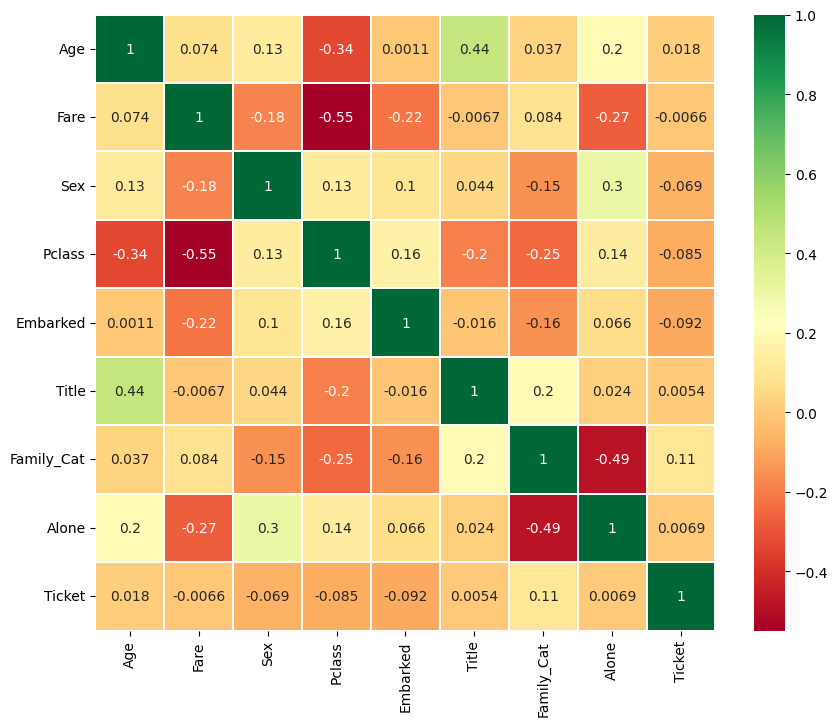

In [ ]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

##### Split data

In [ ]:
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(train_data, y, test_size=0.2)

In [ ]:
X_test = test_data
y_test = test_df['Survived']


In [ ]:
def baseline_result(models, X, y, metrics, cv=15, plot_results=True):
  kfold = StratifiedKFold(cv,shuffle=True,random_state=seed)
  entries=[]
  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model,X,y,scoring=metrics,cv=kfold)
    for kfold_idx,score in enumerate(scores):
      entries.append((model_name,kfold_idx,score))

  res_df = pd.DataFrame(entries,columns = ['Model Name','Fold Index','Accuracy Score'])
  results = res_df.groupby('Model Name')['Accuracy Score'].mean().reset_index()
  results.columns = ['Model Name', 'Mean']

  results.sort_values(by=['Mean'],ascending = False, inplace = True )

  return results

In [ ]:
result1 = baseline_result(models, X_test,y_test, metrics='accuracy', cv=15, plot_results=True)
print(result1)

                   Model Name      Mean
3  GradientBoostingClassifier  0.777513
5                   LinearSVC  0.767901
4        KNeighborsClassifier  0.765520
9               XGBClassifier  0.763316
6          LogisticRegression  0.763228
8                         SVC  0.763139
2        ExtraTreesClassifier  0.758466
7      RandomForestClassifier  0.758377
1      DecisionTreeClassifier  0.746120
0          AdaBoostClassifier  0.734392


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
model = MLPClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(test_data)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.47%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import tqdm

model_list = [
    (RandomForestClassifier(), {
        'n_estimators': [4,16,48, 96, 144, 192],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [5, 4, 8, 12, 16, 20],
        'min_samples_leaf': [5, 10, 15, 20],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    }),

    (XGBClassifier(), {
        'n_estimators': [4,16,48, 96, 144, 192],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [1, 2, 4, 5, 7, 8, 10],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 1, 5],
        'reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 100],
        'reg_lambda': [0, 1e-5, 1e-2, 0.1, 1, 100]
    }),
    (DecisionTreeClassifier(), {
        'max_depth': [4, 8, 12, 16],
    'min_samples_split': [4, 8, 12, 16],
    'min_samples_leaf': [4, 8, 12, 16],
    'criterion': ['gini', 'entropy']
    }),
    (GradientBoostingClassifier(), {
        'n_estimators': [4,16,48, 96,100, 144, 192],
        'loss':['log_loss','exponential','deviance'],
    'learning_rate': [0.01,0.1, 0.04, 0.08, 0.12],
    'max_depth': [4, 8, 12, 16],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [4, 8, 12, 16],
    'min_samples_leaf': [4, 8, 12, 16]
    })
]


kfolds = [5, 10,15]
final_scores, best_models, model_params = {}, {}, {}

for model in tqdm.tqdm(model_list):
    print("================")
    print(f"Working with {model[0].__class__.__name__}")
    print("================")
    for kfold in kfolds:
        model_name = model[0].__class__.__name__
        score, best_params, best_model = train_model(X_train, y_train, model[0], kfold, model[1])
        final_scores[model_name] = score
        best_models[model_name] = best_model
        model_params[model_name] = best_params

#for model, param_dist in model_list:
 # print("===============================")
  #print(f"Working with {model.__class__.__name__} ")
  #print("===============================")
  #for kfold in kfolds:
   # train_model(X_train, y_train, model, kfold, param_dist)



  0%|          | 0/4 [00:00<?, ?it/s]

Working with RandomForestClassifier


RandomForestClassifier: Training Started
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.84
Best Hyperparameters:  {'n_estimators': 144, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'gini', 'bootstrap': False}
Total Time: 15.77 s



RandomForestClassifier: Training Started
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score:  0.82
Best Hyperparameters:  {'n_estimators': 48, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
Total Time: 21.75 s



RandomForestClassifier: Training Started
Fitting 15 folds for each of 10 candidates, totalling 150 fits


 25%|██▌       | 1/4 [00:57<02:51, 57.12s/it]

Best Score:  0.83
Best Hyperparameters:  {'n_estimators': 96, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
Total Time: 19.58 s

Working with XGBClassifier


XGBClassifier: Training Started
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.83
Best Hyperparameters:  {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 96, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}
Total Time: 1.95 s



XGBClassifier: Training Started
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score:  0.83
Best Hyperparameters:  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 144, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}
Total Time: 4.09 s



XGBClassifier: Training Started
Fitting 15 folds for each of 10 candidates, totalling 150 fits


 50%|█████     | 2/4 [01:08<01:00, 30.02s/it]

Best Score:  0.83
Best Hyperparameters:  {'subsample': 1.0, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 4, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 1, 'colsample_bytree': 0.9}
Total Time: 5.02 s

Working with DecisionTreeClassifier


DecisionTreeClassifier: Training Started
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.82
Best Hyperparameters:  {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'gini'}
Total Time: 0.33 s



DecisionTreeClassifier: Training Started
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Score:  0.83
Best Hyperparameters:  {'min_samples_split': 16, 'min_samples_leaf': 8, 'max_depth': 12, 'criterion': 'entropy'}
Total Time: 0.50 s



DecisionTreeClassifier: Training Started
Fitting 15 folds for each of 10 candidates, totalling 150 fits


 75%|███████▌  | 3/4 [01:09<00:17, 17.06s/it]

Best Score:  0.83
Best Hyperparameters:  {'min_samples_split': 8, 'min_samples_leaf': 8, 'max_depth': 12, 'criterion': 'gini'}
Total Time: 0.79 s

Working with GradientBoostingClassifier


GradientBoostingClassifier: Training Started
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.83
Best Hyperparameters:  {'subsample': 0.9, 'n_estimators': 48, 'min_samples_split': 8, 'min_samples_leaf': 12, 'max_depth': 12, 'loss': 'log_loss', 'learning_rate': 0.1}
Total Time: 10.50 s



GradientBoostingClassifier: Training Started
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Best Score:  0.84
Best Hyperparameters:  {'subsample': 0.8, 'n_estimators': 96, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 4, 'loss': 'deviance', 'learning_rate': 0.04}
Total Time: 27.23 s



GradientBoostingClassifier: Training Started
Fitting 15 folds for each of 10 candidates, totalling 150 fits


100%|██████████| 4/4 [02:15<00:00, 33.83s/it]

Best Score:  0.82
Best Hyperparameters:  {'subsample': 0.8, 'n_estimators': 16, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_depth': 12, 'loss': 'exponential', 'learning_rate': 0.1}
Total Time: 27.76 s



In [ ]:
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)

svc.fit(X_train,y_train)

y_svc= svc.predict(X_test)

svc_report = classification_report(y_test, y_svc)


print("Support Vector Machine Report:\n", svc_report)

Support Vector Machine Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       260
           1       0.70      0.72      0.71       158

    accuracy                           0.78       418
   macro avg       0.76      0.76      0.76       418
weighted avg       0.78      0.78      0.78       418



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Best hyperparameters
best_gb_params = {
    'subsample': 0.8,
    'n_estimators': 96,
    'min_samples_split': 4,
    'min_samples_leaf': 4,
    'max_depth': 4,
    'loss': 'deviance',
    'learning_rate': 0.04
}

# Create Gradient Boosting classifier with best hyperparameters
gradient_boosting_model = GradientBoostingClassifier(**best_gb_params)

# Fit the model on the training data
gradient_boosting_model.fit(X_train, y_train)

# Predictions on the test data
y_gb = gradient_boosting_model.predict(X_test)

# Classification report
gb_report = classification_report(y_test, y_gb)

print("Gradient Boosting Report:\n", gb_report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       260
           1       0.69      0.70      0.69       158

    accuracy                           0.77       418
   macro avg       0.75      0.75      0.75       418
weighted avg       0.77      0.77      0.77       418

